# Maximizing Mutual Entropy
Tensorflow edition: Maximizing the mutual information between two sets of stimuli. This computationally method will provide a benchmark to compare against the more agile neurally inspired approach

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
Instructions for updating:
Use `tf.global_variables_initializer` instead.
estimated time: 25.6
took 29.33323645591736 seconds


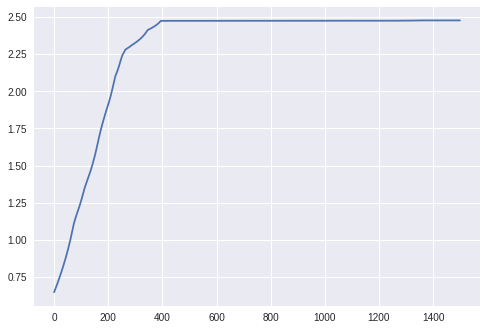

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
import math

num_players = 3
num_stimuli = 8
epsilon=.001
iterations = 1500
ANIMATION_LOGGING = False

stimuli_probabilities = tf.Variable(tf.ones(shape=(num_stimuli))/num_stimuli, trainable=False)
response = tf.Variable(tf.random.uniform(shape=(num_players,num_stimuli)))
response = tf.clip_by_value(response,epsilon,1-epsilon)

#Helper arrays used often but only needed to be computed once
binary_options = tf.constant(list(itertools.product([0, 1], repeat=num_players)))
num_options = binary_options.shape[0]
player_indices = tf.range(num_players)
all_indices = tf.range(num_stimuli*num_options)


def mutual_information(stimuli_probabilities,response):
  responses_both = [1-response,response]
  
  def Pr(op,si):
    return tf.math.reduce_prod(tf.map_fn(lambda y: tf.gather(tf.gather(responses_both,tf.gather(binary_options,op)[y])[y],si), player_indices,dtype=tf.float32))

  pxy = tf.reshape(tf.map_fn(lambda x: Pr(x%num_options,x//num_options)*stimuli_probabilities[x//num_options],all_indices,dtype=tf.float32), shape=(num_stimuli,num_options))
  px = tf.reshape(tf.map_fn(lambda x: stimuli_probabilities[x//num_options],all_indices,dtype=tf.float32), shape=(num_stimuli,num_options))
  py = tf.reshape(tf.tile(tf.reduce_sum(pxy, 0),[num_stimuli]), shape=(num_stimuli,num_options))
  return tf.reduce_sum(pxy * tf.math.log(pxy/(px*py)))/math.log(2)
   

mutual_info = mutual_information(stimuli_probabilities,response) 
train_op = tf.train.AdamOptimizer(1e-3).minimize(-mutual_info)
init_op = tf.initialize_all_variables()


history_trial = []
history_cost = []

responses_checkpoint = []
start = time.time()
#run the graph
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(iterations):
      _,cost = sess.run([train_op,mutual_info])
      history_trial.append(i)
      history_cost.append(cost)
      
      
      if i % 3 == 0 and ANIMATION_LOGGING:
        responses_checkpoint.append(sess.run(response))
      elif i == iterations-1:
        responses_checkpoint.append(sess.run(response))
print("estimated time: {}".format(.4*(2**num_players)*num_stimuli))
print("took {} seconds".format(time.time()-start))
plt.plot(history_trial, history_cost)
plt.show()


# Animation of graphs

Create a movie depicting the weights between input and output stimuli changing during the gradient descent

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

responses_checkpoint_flat = []
for i in range(len(responses_checkpoint)):
  
  response = np.clip(responses_checkpoint[i],.05,.95)
  response = np.vstack([response, np.zeros(num_stimuli)]).T
  responses_checkpoint_flat.append(response.flatten())

colors_empty = ["r","g","b","m","k","c","k","c"][:(num_players+1)]
colors = np.tile(colors_empty,num_stimuli)



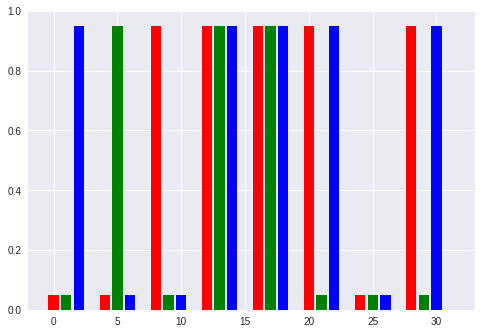

In [0]:
fig=plt.figure()


spacing = np.arange(len(responses_checkpoint_flat[0]))
barcollection = plt.bar(spacing, responses_checkpoint_flat[0], color=colors)

plt.ylim(0,1)
def animate(frame):
    for i, b in enumerate(barcollection):
        b.set_height(responses_checkpoint_flat[frame][i])

# anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=450,
#                              interval=30)



# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# rc('animation', html='jshtml')
# anim




In [0]:
from google.colab import files
anim.save("abc.mov")
files.download("abc.mov") 

NameError: ignored